# Dog breed Multi-Classification using Tensorflow

## 1. Problem

* identifying the breed of a dog from an image

## 2. Data

* kaggle dog breed identification competition

## 3. Evaluation

* will be used multi class log loss for evaluation

## 4. Features
* 10k images (unstructured data)
* deep/transfer learning
* 120 classes of dogs

## Get data ready

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(tf.config.list_physical_devices("GPU"))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


### Turn data into tensors

In [3]:
import pandas as pd

path = "/content/drive/MyDrive/Proiecte/Dog Breed Identification/data/labels.csv"
labels_csv = pd.read_csv(path)

In [4]:
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


#### How many images are per breed

<Axes: >

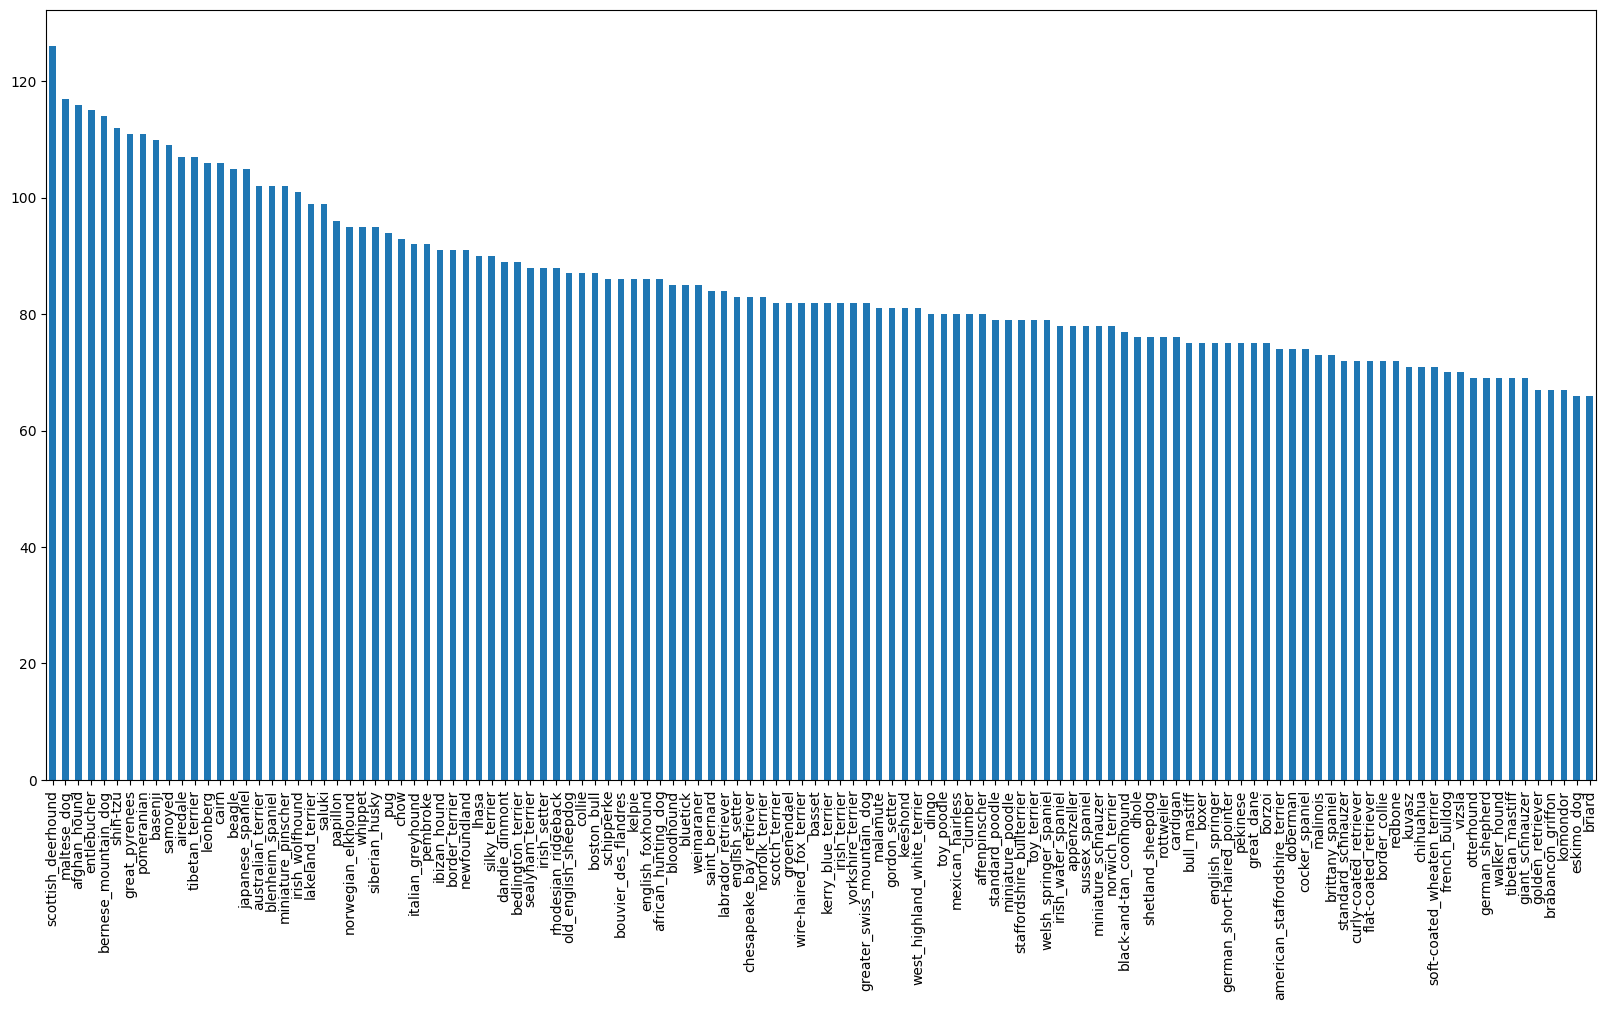

In [5]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10))

#### Preparing the images

In [6]:
# create path names from image ids
base_path = "/content/drive/MyDrive/Proiecte/Dog Breed Identification/data/train/"
filenames = [base_path + fname + ".jpg" for fname in labels_csv["id"]]
filenames[:5]

['/content/drive/MyDrive/Proiecte/Dog Breed Identification/data/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Proiecte/Dog Breed Identification/data/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Proiecte/Dog Breed Identification/data/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Proiecte/Dog Breed Identification/data/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Proiecte/Dog Breed Identification/data/train/0021f9ceb3235effd7fcde7f7538ed62.jpg']

In [7]:
import os

len(os.listdir(base_path)) == len(filenames)

True

In [8]:
import numpy as np

breeds = np.unique(labels_csv["breed"])
len(breeds)

120

In [9]:
bool_labels = [label == breeds for label in np.array(labels_csv["breed"])]
len(bool_labels)

10222

In [10]:
bool_labels[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [11]:
bool_labels[0].astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


#### Create own validation set

In [12]:
# setup X and y variables
X = filenames
y = bool_labels
len(X) == len(y)

True

In [13]:
# start off experimenting with 1000 images and increase as needed
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:100}

In [14]:
from sklearn.model_selection import train_test_split

# split data into training and validation
X_train, X_val, y_train, y_val = train_test_split(
    X[:NUM_IMAGES],
    y[:NUM_IMAGES],
    test_size=0.2,
    random_state=42
)
len(X_train), len(X_val), len(y_train), len(y_val)

(800, 200, 800, 200)

#### Preprocessing images

In [15]:
tf.io.read_file(filenames[0])

<tf.Tensor: shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\n\x07\x07\x08\x07\x06\n\x08\x08\x08\x0b\n\n\x0b\x0e\x18\x10\x0e\r\r\x0e\x1d\x15\x16\x11\x18#\x1f%$"\x1f"!&+7/&)4)!"0A149;>>>%.DIC<H7=>;\xff\xdb\x00C\x01\n\x0b\x0b\x0e\r\x0e\x1c\x10\x10\x1c;("(;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;\xff\xc0\x00\x11\x08\x01w\x01\xf4\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca

In [16]:
# Define image size
IMG_SIZE = 224

def process_image(image_path):
  """
  Takes an image file path and turns it into a Tensor.
  """
  # Read in image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-225 values to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired size (224, 244)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  return image

#### Turn data into batches

* 32 is the default batch size for deep learning models (mostly)
* why batches?
* processing 10k images in one go might not fit into memory :)
* so thats why 32 images at a time



In [17]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label,
  processes the image and returns a tuple of (image, label).
  """
  image = process_image(image_path)
  return image, label

In [18]:
# Define the batch size, 32 is a good default
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (x) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle it if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If the data if a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    # If the data is a training dataset, we shuffle it
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels

    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [19]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [20]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

#### Visualizing data batches

In [21]:
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch
  """
  plt.figure(figsize=(10,10))
  for i in range(25):
    # Create subplots
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i])
    # Add image label as the title
    plt.axis("off")

In [22]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [23]:
train_images, train_labels = next(
    train_data.as_numpy_iterator()
)

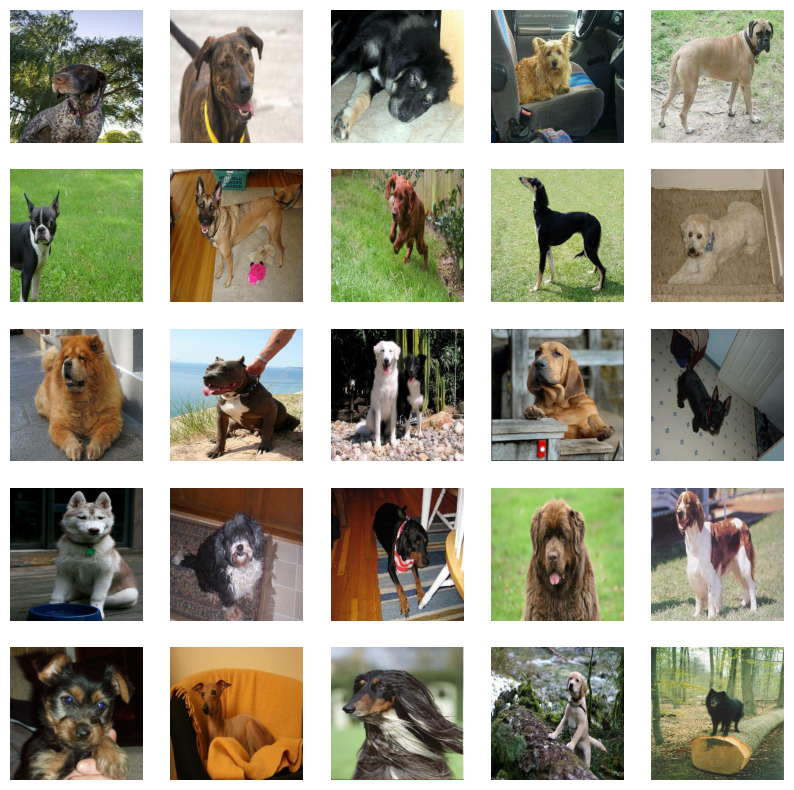

In [24]:
show_25_images(train_images, train_labels)

#### Preparing inputs and outputs

In [25]:
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3]
OUTPUT_SHAPE = len(breeds)

# setup model url from tensorflow hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

### Modelling

#### Create a model

In [26]:
# function that takes input shape, output shape and the model
# defines the layers in a keras model in a sequencial way
# compiles the model (how it should be evaluated and improved)
# build the model
# returns the model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("building model with:", model_url)

  # setup model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(model_url),  # layer 1 input
    # convert to the desired output shape
    tf.keras.layers.Dense(
        units=OUTPUT_SHAPE,  # layer 2 output
        activation="softmax"
    )
  ])
  model.compile(
      # how well model is guessing
      loss=tf.keras.losses.CategoricalCrossentropy(),
      # improve model guessing
      optimizer=tf.keras.optimizers.Adam(),
      # evaluate model guessing
      metrics=["accuracy"]
  )
  model.build(input_shape)  # Batch input shape.
  return model


In [27]:
model = create_model()
model.summary()

building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


#### Creating callbacks

* helper functions a model can use during training to do such things as saving its progress, check its progress or stop training early if the model stops improving

In [28]:
# tensorboard - model progress
%load_ext tensorboard

In [29]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("drive/My Drive/Data/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

* early stopping - prevent overfitting by stopping a model when a certain evaluation metric stops improving. If a model trains for too long, it can do so well at finding patterns in a certain dataset that it's not able to use those patterns on another dataset it hasn't seen before (doesn't generalize)

In [30]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3) # stops after 3 rounds of no improvements


#### Training model

* initially train the model on 1000 images to make sure everything is working
* number of epochs: how many passes of the data the model does

In [31]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

In [32]:
def train_model():
  model = create_model()
  tensorboard = create_tensorboard_callback()
  model.fit(
      x=train_data,
      epochs=NUM_EPOCHS,
      validation_data=val_data,
      validation_freq=1,
      callbacks=[tensorboard, early_stopping]
    )
  return model

In [33]:
model = train_model()

building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Epoch 1/100
25/25 [==============================] - 200s 7s/step - loss: 4.6680 - accuracy: 0.0975 - val_loss: 3.4444 - val_accuracy: 0.2600
Epoch 2/100
25/25 [==============================] - 3s 119ms/step - loss: 1.6661 - accuracy: 0.6737 - val_loss: 2.1855 - val_accuracy: 0.4600
Epoch 3/100
25/25 [==============================] - 3s 125ms/step - loss: 0.5795 - accuracy: 0.9425 - val_loss: 1.7230 - val_accuracy: 0.5550
Epoch 4/100
25/25 [==============================] - 4s 171ms/step - loss: 0.2559 - accuracy: 0.9862 - val_loss: 1.5277 - val_accuracy: 0.6050
Epoch 5/100
25/25 [==============================] - 3s 127ms/step - loss: 0.1484 - accuracy: 0.9975 - val_loss: 1.4498 - val_accuracy: 0.6350
Epoch 6/100
25/25 [==============================] - 3s 120ms/step - loss: 0.1015 - accuracy: 1.0000 - val_loss: 1.3971 - val_accuracy: 0.6200
Epoch 7/100
25/25 [==============================]

* It looks like the model is overfitting. Ways to prevent overfitting in deep learning neural networks:
  -  


In [ ]:
# %tensorboard --logdir /content/drive/MyDrive/Data/logs

In [35]:
predictions = model.predict(val_data, verbose=1)
predictions.shape

7/7 [==============================] - 5s 150ms/step


(200, 120)

In [36]:
len(y_val), len(breeds)

(200, 120)

In [37]:
# softmax activation
np.sum(predictions[0])

1.0

In [38]:
index = 42
print(predictions[index])
print(f"Max value probability of prediction: {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {breeds[np.argmax(predictions[index])]}")

[1.11042231e-04 3.17609301e-05 5.80598635e-06 6.25024913e-05
 5.76450839e-04 4.95941422e-05 2.39829151e-05 5.14074869e-04
 2.66753859e-03 1.17819291e-02 1.13925626e-05 6.13182283e-06
 2.41818416e-04 3.85077391e-03 1.35450828e-04 1.43987755e-03
 7.16669456e-06 1.75876135e-04 2.66683550e-04 3.30736439e-05
 1.10309984e-05 5.42940979e-04 1.57602262e-05 1.80344996e-05
 6.84171449e-03 1.49396801e-05 1.95665016e-05 8.70811200e-05
 2.09296450e-05 7.71473788e-05 2.95134469e-05 7.43609644e-06
 2.01492385e-05 3.10508221e-05 5.42668931e-06 1.25449606e-05
 1.40578457e-04 8.81666056e-05 1.40864367e-05 1.35688230e-01
 2.57137377e-04 1.28626798e-05 3.70952021e-03 7.59844716e-06
 4.79532791e-05 1.04110832e-05 3.86615102e-05 9.99827680e-05
 1.64333815e-05 6.37495323e-05 3.01577511e-05 3.48861176e-05
 9.22334366e-05 7.06850667e-04 9.00272425e-06 2.04695767e-04
 1.40896809e-04 2.17954366e-05 3.05012218e-05 2.84483849e-05
 9.30399801e-06 1.70934669e-04 2.72188572e-06 1.21679477e-05
 5.14901840e-05 8.372592

#### Transform predictions to text

In [39]:
def get_prediction_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities
  """
  return breeds[np.argmax(prediction_probabilities)]

pred_label = get_prediction_label(predictions[81])
pred_label

'dingo'

In [40]:
def unbatchify(batch_set):
  """
  Takes a batched dataset of (image, label) tensors and returns
  separate arrays of images and labels
  """
  images = []
  labels = []
  for image, label in batch_set.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(breeds[np.argmax(label)])
  return images, labels

val_images, val_labels = unbatchify(val_data)
get_prediction_label(val_labels[42]), get_prediction_label(predictions[42])

('affenpinscher', 'walker_hound')

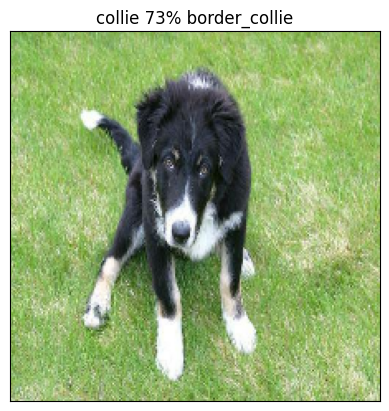

In [41]:
def plot_pred(prediction_prob, labels, images, n=1):
  """
  View the prediction, ground truth and image for sample n
  """
  pred_prob, true_label, image = prediction_prob[n], labels[n], images[n]
  pred_label = get_prediction_label(pred_prob)
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])
  plt.title("{} {:2.0f}% {}".format(pred_label, np.max(pred_prob)*100, true_label))

plot_pred(predictions, val_labels, val_images, n=9)

In [42]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plots the top 10 highest prediction confidences along with
  the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_prediction_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

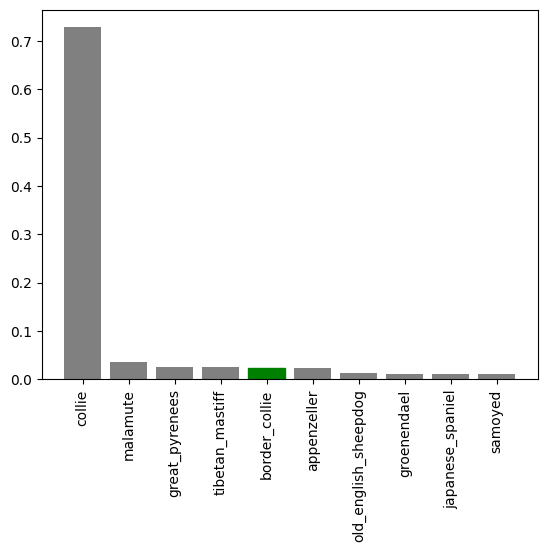

In [43]:
plot_pred_conf(
    prediction_probabilities=predictions,
    labels=val_labels,
    n=9
)

### Save and load a model

In [44]:
def save_model(model, suffix=None):
  """
  Saves a given model in the current dir and appends a suffix
  """
  model_dir = os.path.join(
      "/content/drive/MyDrive/Proiecte/Dog Breed Identification/models",
      datetime.datetime.now().strftime("%Y%m%d")
  )
  model_path = model_dir + "-" + suffix + ".h5"
  model.save(model_path)
  return model_path


In [45]:
def load_model(model_path):
  model = tf.keras.models.load_model(
      model_path,
      custom_objects={
          "KerasLayer": hub.KerasLayer
      }
  )
  return model

In [46]:
save_model(model, suffix="1000-images-adam-mobilenet")

'/content/drive/MyDrive/Proiecte/Dog Breed Identification/models/20230706-1000-images-adam-mobilenet.h5'

### Train model on the whole dataset

In [51]:
data = create_data_batches(X, y)
len(data)

Creating training data batches...


320

In [48]:
model = create_model()

building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


In [49]:
full_tensorboard = create_tensorboard_callback()
full_early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="accuracy",
    patience=3
)

In [52]:
model.fit(
    x=data,
    epochs=NUM_EPOCHS,
    callbacks=[full_tensorboard, full_early_stopping]
)

Epoch 1/100
320/320 [==============================] - 33s 103ms/step - loss: 0.0606 - accuracy: 0.9915
Epoch 2/100
320/320 [==============================] - 34s 107ms/step - loss: 0.0481 - accuracy: 0.9935
Epoch 3/100
320/320 [==============================] - 33s 104ms/step - loss: 0.0381 - accuracy: 0.9957
Epoch 4/100
320/320 [==============================] - 33s 103ms/step - loss: 0.0324 - accuracy: 0.9966
Epoch 5/100
320/320 [==============================] - 33s 104ms/step - loss: 0.0276 - accuracy: 0.9972
Epoch 6/100
320/320 [==============================] - 33s 103ms/step - loss: 0.0221 - accuracy: 0.9982
Epoch 7/100
180/320 [===============>..............] - ETA: 17s - loss: 0.0216 - accuracy: 0.9983

KeyboardInterrupt: ignored